In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import pandas as pd

In [4]:
data = pd.read_excel('DSE13-21.xlsx')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-23,5413.73,5412.19,5451.92,5400.68,-,0.0003
1,2021-03-22,5412.19,5349.77,5418.69,5289.81,-,0.0117
2,2021-03-21,5349.77,5434.69,5434.69,5337.38,-,-0.0156
3,2021-03-18,5434.69,5516.40,5516.40,5414.96,-,-0.0148
4,2021-03-16,5516.40,5532.97,5572.42,5503.38,-,-0.0030


In [6]:
#data.isnull().sum()

In [7]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

C:\Users\prabi\AppData\Local\Temp/ipykernel_15848/2985681012.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
C:\Users\prabi\AppData\Local\Temp/ipykernel_15848/2985681012.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-23,5413.73,5412.19,5451.92,5400.68,-,0.0003
1,2021-03-22,5412.19,5349.77,5418.69,5289.81,-,0.0117
2,2021-03-21,5349.77,5434.69,5434.69,5337.38,-,-0.0156
3,2021-03-18,5434.69,5516.40,5516.40,5414.96,-,-0.0148
4,2021-03-16,5516.40,5532.97,5572.42,5503.38,-,-0.0030


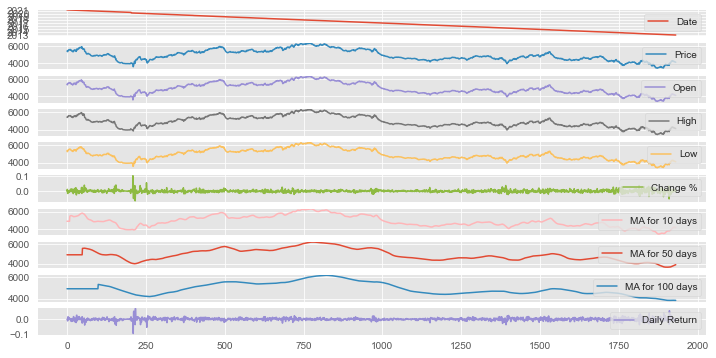

C:\Users\prabi\AppData\Local\Temp/ipykernel_15848/3883770807.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


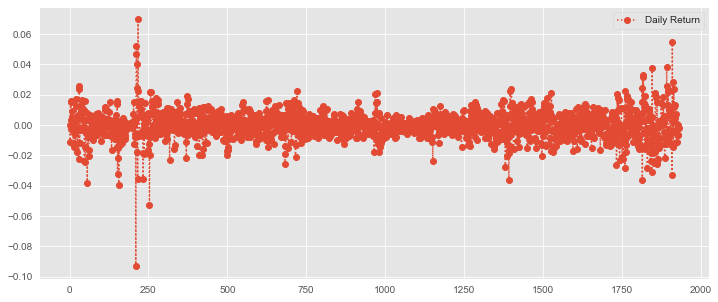

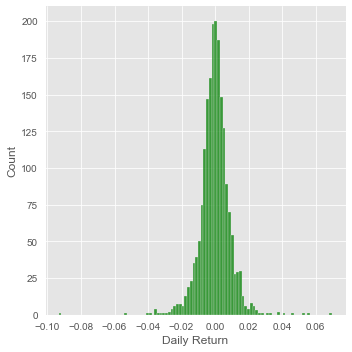

C:\Users\prabi\AppData\Local\Temp/ipykernel_15848/3883770807.py:29: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
C:\Users\prabi\AppData\Local\Temp/ipykernel_15848/3883770807.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


           Date    Price     Open     High      Low Vol.  Change %  \
0    2021-03-23  5413.73  5412.19  5451.92  5400.68    -    0.0003   
1    2021-03-22  5412.19  5349.77  5418.69  5289.81    -    0.0117   
2    2021-03-21  5349.77  5434.69  5434.69  5337.38    -   -0.0156   
3    2021-03-18  5434.69  5516.40  5516.40  5414.96    -   -0.0148   
4    2021-03-16  5516.40  5532.97  5572.42  5503.38    -   -0.0030   
...         ...      ...      ...      ...      ...  ...       ...   
1926 2013-02-05  4191.50  4191.50  4191.50  4191.50    -    0.0065   
1927 2013-02-04  4164.62  4164.62  4164.62  4164.62    -    0.0002   
1928 2013-02-03  4163.82  4163.82  4163.82  4163.82    -    0.0067   
1929 2013-01-31  4136.30  4136.30  4136.30  4136.30    -    0.0023   
1930 2013-01-30  4126.75  4126.75  4126.75  4126.75    -   -0.0067   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0        4914.371425     4917.495571      4926.928459     -0.000100  
1        4914.37142

Date               0
Price              0
Open               0
High               0
Low                0
Vol.               0
Change %           0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

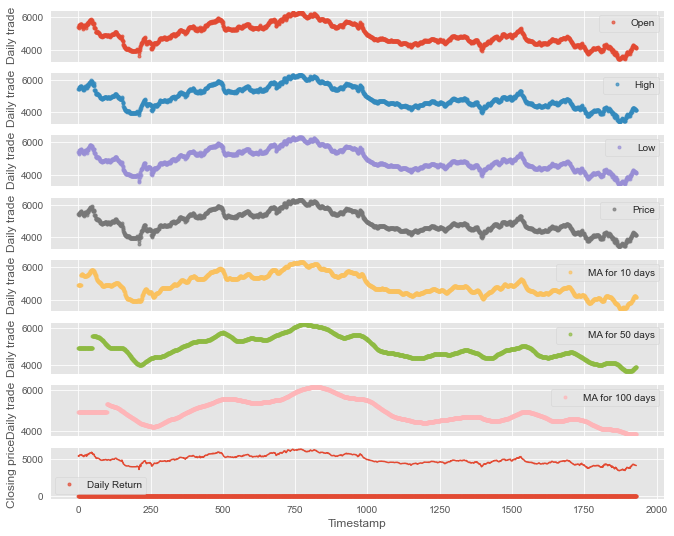

In [13]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Price'],ma).mean()

data['Daily Return'] = data['Price'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Price'])
close1  = closing_df1.rename(columns={"Price": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Price','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Price'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

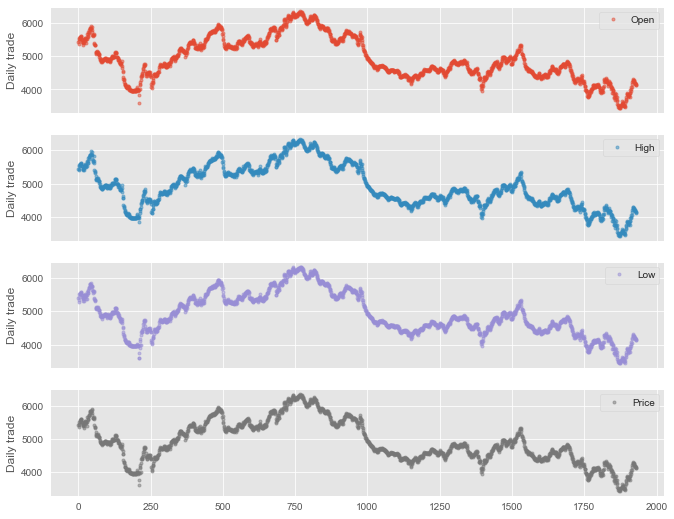

In [14]:
cols_plot = ['Open', 'High', 'Low','Price']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           Date    Price     Open     High      Low Vol.  Change %  \
0    2021-03-23  5413.73  5412.19  5451.92  5400.68    -    0.0003   
1    2021-03-22  5412.19  5349.77  5418.69  5289.81    -    0.0117   
2    2021-03-21  5349.77  5434.69  5434.69  5337.38    -   -0.0156   
3    2021-03-18  5434.69  5516.40  5516.40  5414.96    -   -0.0148   
4    2021-03-16  5516.40  5532.97  5572.42  5503.38    -   -0.0030   
...         ...      ...      ...      ...      ...  ...       ...   
1926 2013-02-05  4191.50  4191.50  4191.50  4191.50    -    0.0065   
1927 2013-02-04  4164.62  4164.62  4164.62  4164.62    -    0.0002   
1928 2013-02-03  4163.82  4163.82  4163.82  4163.82    -    0.0067   
1929 2013-01-31  4136.30  4136.30  4136.30  4136.30    -    0.0023   
1930 2013-01-30  4126.75  4126.75  4126.75  4126.75    -   -0.0067   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0        4914.371425     4917.495571      4926.928459     -0.000100  
1        4914.37142

,count,mean,std,min,25%,50%,75%,max
Price,1931.0,4913.866748,634.764089,3438.890000,4460.730000,4793.990000,5411.04000,6336.880000
Open,1931.0,4913.469322,634.751260,3438.890000,4459.285000,4793.300000,5410.75500,6336.880000
High,1931.0,4918.497323,634.580976,3438.890000,4467.565000,4798.390000,5413.54500,6336.880000
Low,1931.0,4909.943547,635.378721,3438.890000,4456.200000,4791.470000,5406.47500,6336.880000
Change %,1931.0,0.000177,0.009010,-0.065200,-0.004400,0.000100,0.00445,0.102900
MA for 10 days,1931.0,4914.371425,630.281804,3478.846000,4468.193000,4798.745000,5413.14600,6301.709000
MA for 50 days,1931.0,4917.495571,604.024635,3634.151000,4478.298800,4804.625000,5419.11920,6231.477600
MA for 100 days,1931.0,4926.928459,565.770063,3855.582300,4515.816050,4789.933800,5411.62215,6172.932500
Daily Return,1931.0,-0.000100,0.008966,-0.093337,-0.004436,-0.000138,0.00442,0.069692


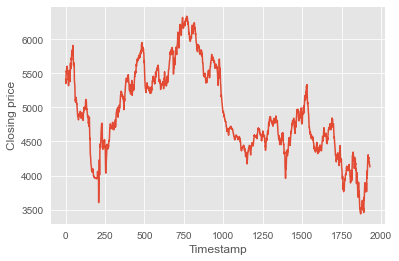

In [15]:
plt.plot(data['Price'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [16]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

1463
366


In [17]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
37/37 [==============================] - 7s 44ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0557 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0406
Epoch 2/40
37/37 [==============================] - 0s 13ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0366 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0324
Epoch 3/40
37/37 [==============================] - 0s 13ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0324 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0275
Epoch 4/40
37/37 [==============================] - 1s 14ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0293 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0289
Epoch 5/40
37/37 [==============================] - 1s 14ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0285 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0283
Epoch 6/40
37/37 [==============================] - 1s 15ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0299 - val_loss: 9.2208e-04 - val_mse: 9.2208e-04 - val_mae: 0.0237
Epoch 7/40
37/

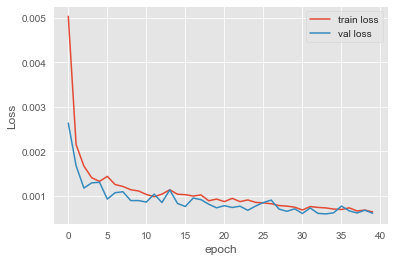

In [18]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

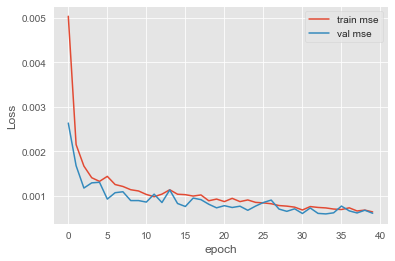

In [19]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

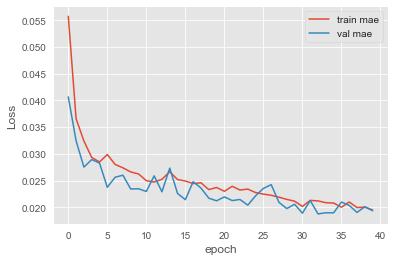

In [20]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [21]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [22]:
model.evaluate(test_X, test_Y)

12/12 [==============================] - 0s 4ms/step - loss: 6.0259e-04 - mse: 6.0259e-04 - mae: 0.0193


[0.0006025939364917576, 0.0006025939364917576, 0.019345395267009735]

In [25]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

mse = mean_squared_error(test_Y.reshape(-1,1), yhat_probs)
print('Mean Squared error: %f' % mse)

mae = mean_absolute_error(test_Y.reshape(-1,1), yhat_probs)
print('Mean absolute error: %f' % mae)

mape = mean_absolute_percentage_error(test_Y.reshape(-1,1), yhat_probs)
print('Mean absolute percentage error: %f' % mape)

Variance: 0.938643
R2 Score: 0.938643
Max Error: 0.091592
Mean Squared error: 0.000603
Mean absolute error: 0.019345
Mean absolute percentage error: 0.903788
